# **Import**

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# new libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **Dataset**

https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv

In [2]:
#Load in data
df = pd.read_csv('/content/cust_seg.csv')

In [3]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [5]:
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [7]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 150 missing values.


In [8]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [9]:
## Print the unique values for the column
print(df['Defaulted'].unique())

[ 0.  1. nan]


- Proceeded without the "Defaulted" column due to NAN value error code that conflicts with Sci-Kit Learn for some reason. We can leave for discussion. 

# **Objective**

Perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

In [10]:
# Define the columns

x = df[['Age','Edu','Years Employed','Income','Card Debt','Other Debt','Defaulted','DebtIncomeRatio']]

In [11]:
x.dropna(inplace = True)

<ipython-input-11-5318caca612f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace = True)


In [12]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_x = scaler.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

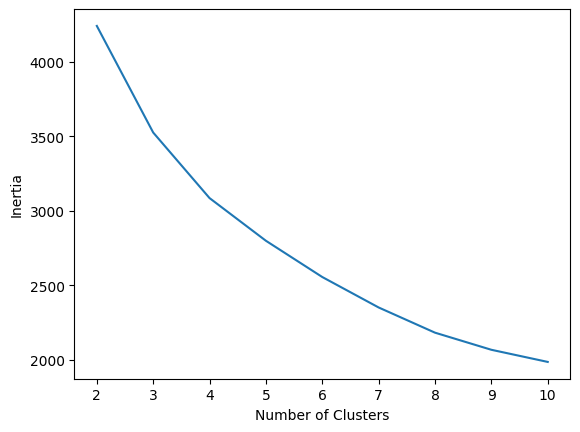

In [13]:
# Define a range of values of k to evaluate for inertia and empty list
ks = range(2, 11)
inertias = []

# for each value for k
for k in ks:
  
  # Fit and run the model,
  km = KMeans(n_clusters=k)
  km.fit(scaled_x)
  inertias.append(km.inertia_)

# Plot the results
plt.plot(ks, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

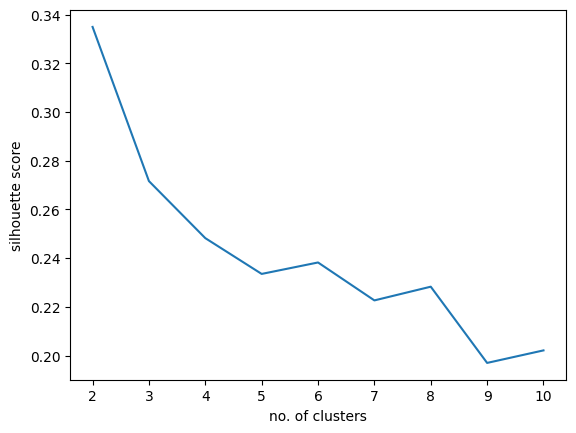

In [14]:
# define a range of values of k to evaluate for silhouette score and empty list
ks = range(2, 11)
sils = []


# for each value for k
for k in ks:

  # fit and run the model,
  km = KMeans(n_clusters=k)
  km.fit(scaled_x)
  sils.append(silhouette_score(scaled_x, km.labels_))



# and plot the results
plt.plot(ks, sils)
plt.xlabel('no. of clusters')
plt.ylabel('silhouette score')
plt.show() 

# **Final Model and Clustering Dataset**

In [15]:
# Instantiate a KMeans model with the value for k based on elbow plot method 
# and silhouette score
km = KMeans(n_clusters=5, random_state=42)
km.fit(scaled_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [16]:
# Add a column to the dataframe to add the cluster label as you fit and predict x 
x['cluster'] = km.labels_

<ipython-input-16-f6f870ba235f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] = km.labels_


In [17]:
# Examine your dataframe with .head()
x.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,3
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,3
4,47,1,31,253,9.308,8.908,0.0,7.2,4


- I choose Silhouette Score for K as it clearly explains results based on numerical grouping. Preferred for non-techincal audience. 

In [18]:
# Use .groupby() to investigate the average .
cluster_groups = x.groupby('cluster')

In [20]:
# calcualte the average values for each cluster for each column
cluster_means = cluster_groups.mean()
cluster_means

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,31.155405,1.817568,3.371622,28.729730,1.328547,2.383791,0.993243,13.272297
1,39.817204,2.010753,13.354839,70.612903,3.773333,8.243581,0.268817,18.646237
2,41.759398,1.526316,16.195489,70.436090,1.445008,2.697241,0.022556,6.312782
3,31.847619,1.660317,5.546032,30.088889,0.669981,1.582768,0.000000,7.797143
4,45.636364,2.181818,20.909091,205.090909,12.429182,14.907091,0.727273,17.118182


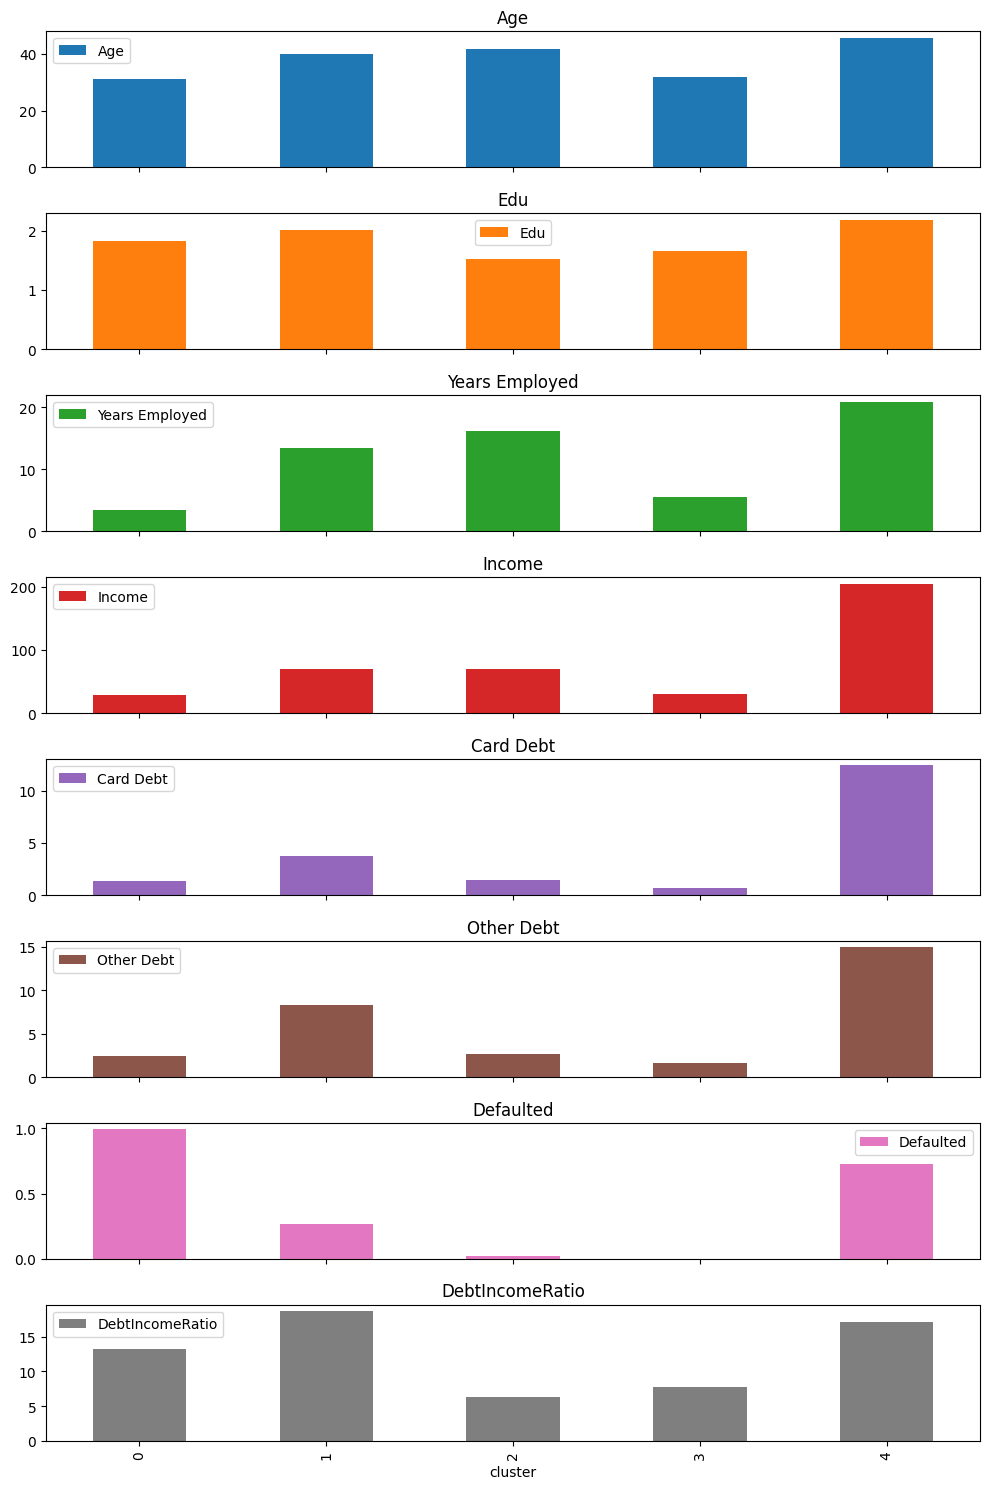

In [22]:
# Visualize means values of each column
cluster_means.plot(subplots=True, kind='bar', figsize=(10,15))
plt.tight_layout()

**cluster_0** = Young generation in their 20's whom are educated, do not commit to a single employer, make little income, mindful credit card and other debt usage yet have high debt to income ratio with outstanding default statuses. 
**Recommendation:** Market secured credit cards and high APR credit cards

**cluster_1** = Educated generation in their 30's who do dedicate time with a single employer, make moderate income, have high credit card and other debt usage, low default status but extremely high debt to income ratio.
**Recommendation:** Market balance transfer credit cards and average APR credit cards 

**cluster_2** = Generation in their 40's who is averagely educated compared to other generations, sustains career growth with an single employer, moderate income, low credit card and other debt usage, low default status and lowest debt to income ratio.
**Recommendation:** Market low intro promotional rates credit cards 

**cluster_3** = Generation in their 20's, with slightly less education than inital cluster, make about the same low income but more loyal to commiting to an single employer. They have the lowest credit card and other debt usage compared to other clusters with zero defaults and average debt to income ratio.
**Recommendation:** Market a promotional offer 0% interest credit cards 

**cluster_4** = The oldest generation in the dataset, are highly educated, completely loyal to a single employer, high income, high credit card and other debt usage, moderate default statuses, and high debt to income ratio. 
**Recommendation:** Market balance transfer credit cards and high APR credit cards 
